# RDKit: Open-Source Cheminformatics Software

RDKit is an open-source cheminformatics software toolkit. It is written in C++ with wrappers for Python, Java, and C# and is widely used in both academia and industry for various applications, such as drug discovery, material science, and chemical informatics research.

In [1]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

# Molecular Representation

RDKit allows for reading and writing chemical formats like SMILES, MOL, and SDF. It also supports the creation and manipulation of molecular structures.

## [SMILES Format](https://en.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System)

### Melatonin
#### 😴😴😴

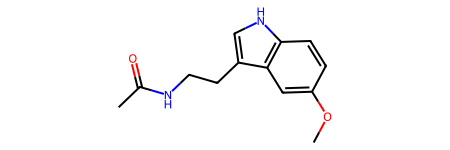

In [2]:
m = Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m

## [MOL File Format](https://goldbook.iupac.org/terms/view/MT06966)


A MOL file is a text-based format used to represent chemical structures, including atomic coordinates, bond information, and other metadata. It's primarily used by MDL Information Systems (now part of Elsevier) and is a common standard for importing and exporting molecular data. MOL files can store information about a single molecule or multiple molecules, and they are often used in cheminformatics and computational chemistry. 

Using requests to [Drugbank's](https://go.drugbank.com/) database of molecules, we can quickly research structures using a precise file format (MOL). I wanted to hack at first using requests, but they have set up an [API](https://docs.drugbank.com/v1/#introduction) requiring proper authentication... RIP the good ole days.

In [3]:
url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB01065.mol'
mol = requests.get(url)

In [4]:
mol

<Response [403]>

*An authentication error, telling me to get off my lazy but to build a wrapper for that uses their API tokens.*

### Example MOL File Contents

In [5]:
mol = """
 Mrv1652309231722062D          

 17 18  0  0  0  0            999 V2000
    4.5615   -4.9343    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8470   -4.5218    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2760   -3.6968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2760   -4.5218    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5615   -3.2843    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8470   -3.6968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0605   -4.7767    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.5454   -4.1093    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.1224   -2.4857    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0605   -3.4419    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3154   -2.6573    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.1843   -1.5297    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.3773   -1.7012    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    8.7363   -2.1427    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.4393   -0.7450    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1326   -3.2843    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4181   -3.6968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  0  0  0  0
 10  3  1  0  0  0  0
  1  4  2  0  0  0  0
  4  3  1  0  0  0  0
  4  7  1  0  0  0  0
  5  3  2  0  0  0  0
  6  5  1  0  0  0  0
  2  6  2  0  0  0  0
 16  6  1  0  0  0  0
  8  7  1  0  0  0  0
 10  8  2  0  0  0  0
 13  9  1  0  0  0  0
  9 11  1  0  0  0  0
 11 10  1  0  0  0  0
 13 12  1  0  0  0  0
 14 12  2  0  0  0  0
 15 12  1  0  0  0  0
 16 17  1  0  0  0  0
M  END
"""

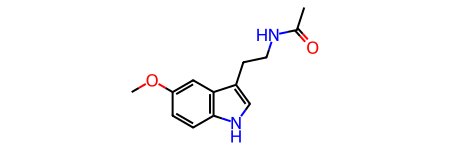

In [6]:
melatonin = Chem.MolFromMolBlock(mol)
melatonin

# Descriptors

In [7]:
melatonin.GetNumAtoms()

17

In [8]:
[atom.GetSymbol() for atom in melatonin.GetAtoms() if not atom.IsInRing()]

['C', 'C', 'C', 'N', 'O', 'C', 'O', 'C']

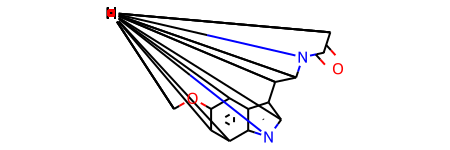

In [9]:
m_w_hydrogens = Chem.AddHs(melatonin)
m_w_hydrogens

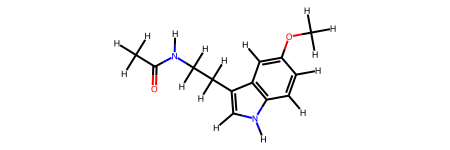

In [10]:
AllChem.Compute2DCoords(m_w_hydrogens)
m_w_hydrogens

In [11]:
Descriptors.MolWt(melatonin)

232.28299999999996

In [12]:
# less reliable, can only really measure in a lab ~ a prediction
Descriptors.MolLogP(melatonin)

1.8550999999999995

In [13]:
Descriptors.NumRotatableBonds(melatonin)

4

# Lipinski's Rule of 5

[Wiki](https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five)